In [1]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [2]:
home_dir = '/home/hpcgies1/Projects/TPS_may/'

In [993]:
X = pd.read_csv("/home/hpcgies1/Projects/TPS_may/Data/train.csv")
Y = pd.read_csv("/home/hpcgies1/Projects/TPS_may/Data/test.csv")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [932]:
X.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


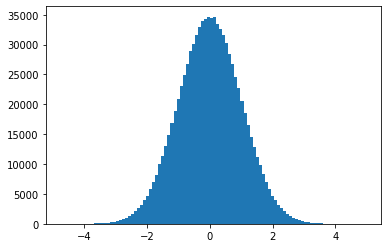

In [110]:
fzero = X['f_04'].values
target = X['target']


plt.hist(fzero, bins=100)
plt.show()

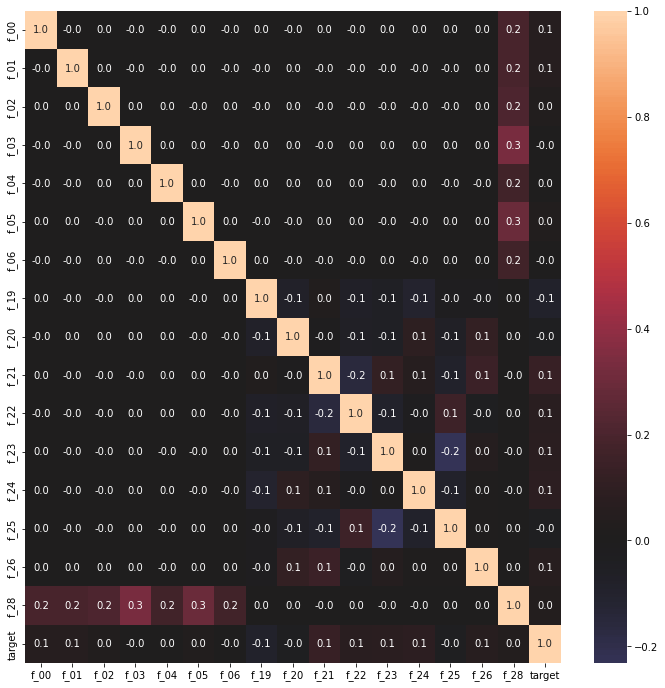

In [20]:
float_features = [f for f in X.columns if X[f].dtype == 'float64']

plt.figure(figsize=(12, 12))
sns.heatmap(X[float_features + ['target']].corr(), center=0, annot=True, fmt='.1f')
plt.show()

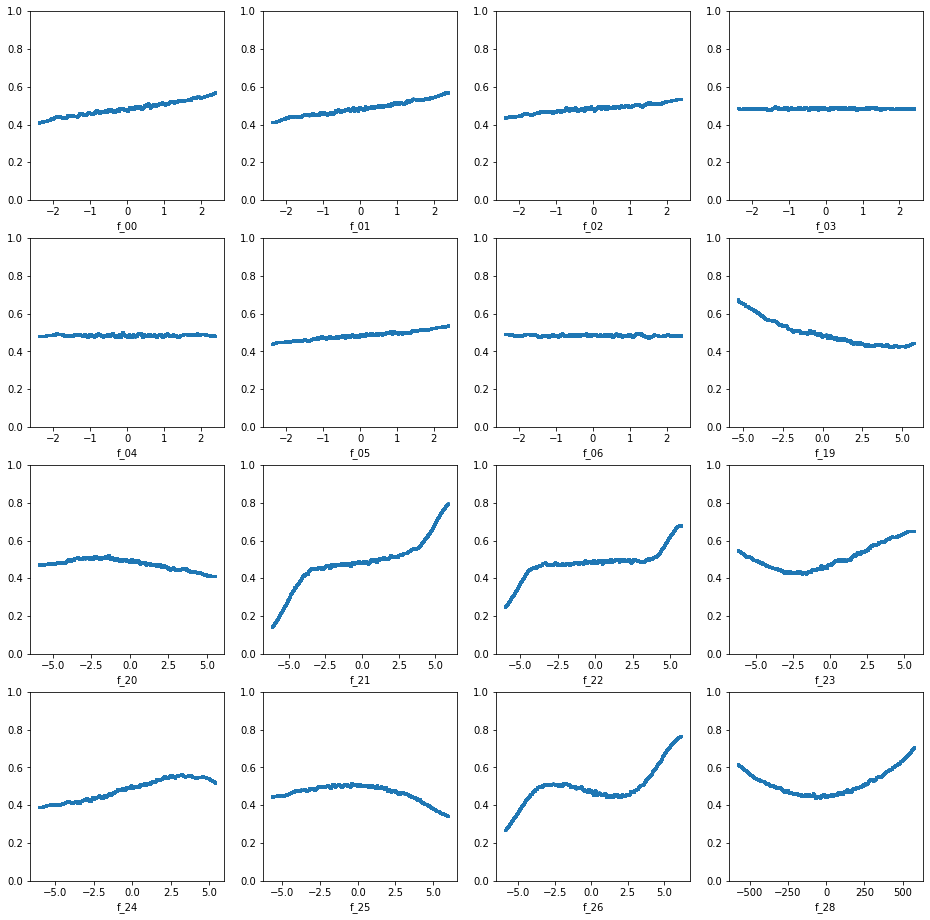

In [929]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

def safe_exp(x):
    y = np.exp(x)
    y = [y[i] if y[i] != np.inf else x[i] for i in range(len(y))]
    return y

def zzscore(x):
    return (x - np.mean(x))/np.std(x)

for f, ax in zip(float_features, axs.ravel()):
    temp = pd.DataFrame({f: X[f].values,#1/X[f].values,
                         'state': X.target.values})
    temp = temp.sort_values(f)
    temp.reset_index(inplace=True)
    ax.scatter(temp[f], temp.state.rolling(15000, center=True).mean(), s=2)
    ax.set_xlabel(f'{f}')
    ax.set_ylim([0,1])
# plt.suptitle('How the target probability depends on single features')
plt.show()

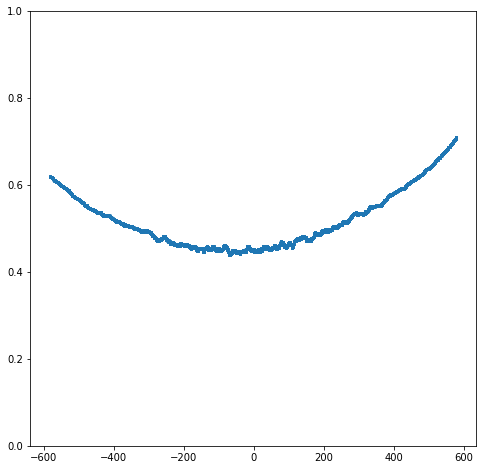

In [930]:
fig, axs = plt.subplots(1,1, figsize=(8, 8))

pt = StandardScaler()



# xx = pd.DataFrame(np.array([X['f_04'], X['f_03'], X['f_06']]).transpose([1,0]), columns=['4','3','6'])

temp = pd.DataFrame({'f': X['f_28'] + X['f_04'] + X['f_03'] + X['f_06'] ,
                     'state': X.target.values})
temp = temp.sort_values('f')
temp.reset_index(inplace=True)
axs.scatter(temp['f'], temp.state.rolling(15000, center=True).mean(), s=2)

axs.set_ylim([0,1])
plt.show()

# Interaction

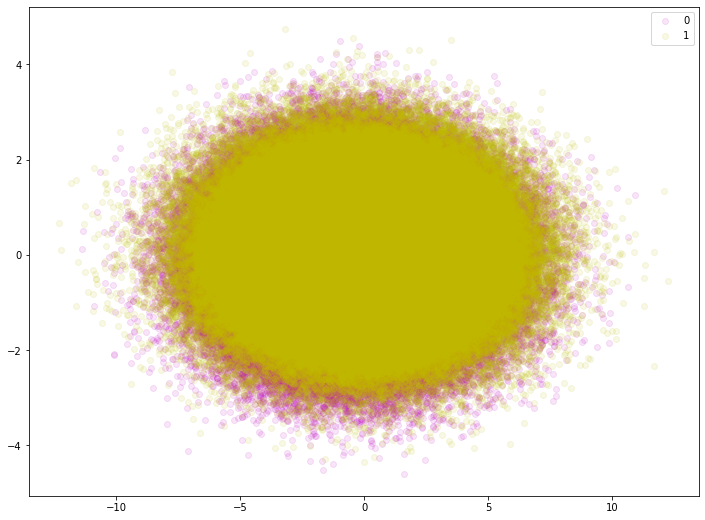

In [990]:
x_0 = X.loc[X['target'] == 0, 'f_23']
x_1 = X.loc[X['target'] == 1, 'f_23']

y_0 = X.loc[X['target'] == 0, 'f_00']
y_1 = X.loc[X['target'] == 1, 'f_00']


plt.figure(figsize=(12,9))
plt.scatter(x_0, y_0, alpha=0.1, c='m', label='0')
plt.scatter(x_1, y_1, alpha=0.1, c='y', label='1')


# plt.vlines(-6.6, -10,10)
# plt.hlines(-6.6, -10,10)

plt.legend()
plt.show()

# Int features

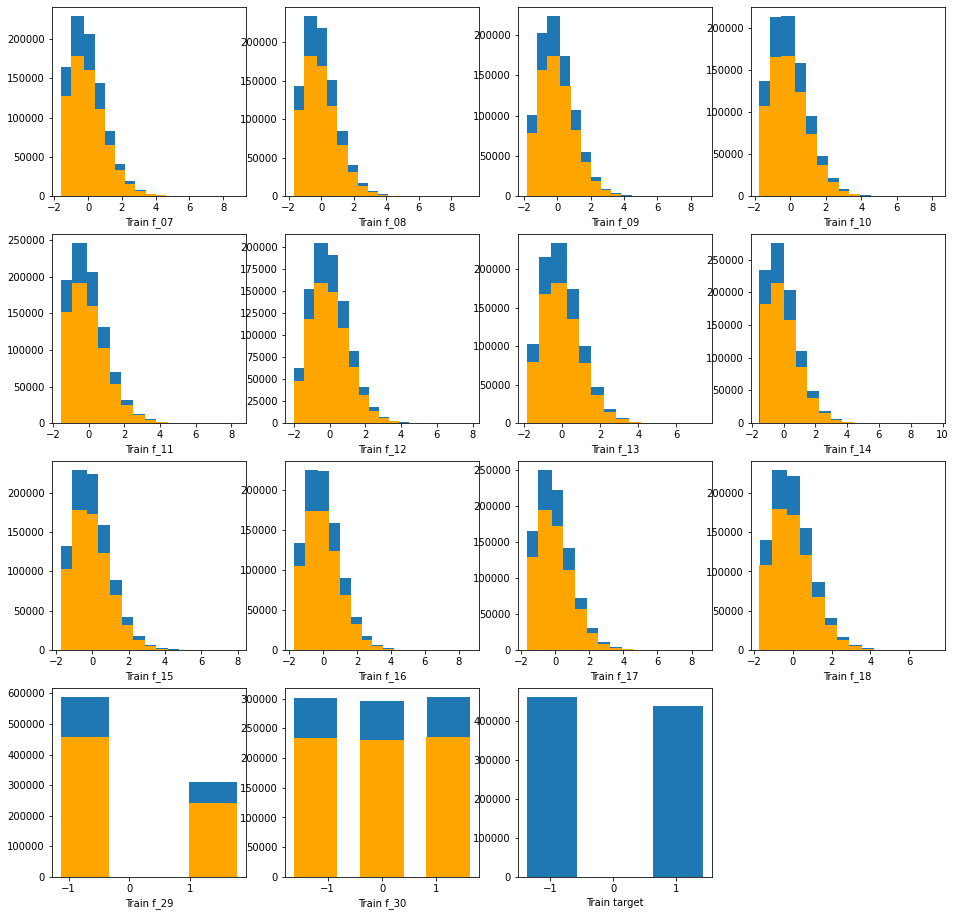

In [275]:
int_features = [f for f in X.columns if X[f].dtype == 'int64' and f != 'id']

# Training histograms
#fig, axs = plt.subplots(4, 4, figsize=(16, 16))
plt.figure(figsize=(16, 16))
# for f, ax in zip(int_features, axs.ravel()):
for i, f in enumerate(int_features):
    plt.subplot(4, 4, i+1)
    ax = plt.gca()
    temp = X[f].values
#     temp = np.log1p(temp)
    temp = (temp - np.mean(temp)) / np.std(temp)
#     vc = X[f].value_counts()
    vc = pd.Series(temp).value_counts()
    ax.bar(vc.index, vc)
    ax.set_xlabel(f'Train {f}')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
    
    if f != 'target':
        temp = Y[f].values
    #     temp = np.log1p(temp)
        temp = (temp - np.mean(temp)) / np.std(temp)
    #     vc = X[f].value_counts()
        vc = pd.Series(temp).value_counts()
        ax.bar(vc.index, vc, color='orange')
        ax.set_xlabel(f'Train {f}')
    

plt.show()

# Strings

In [53]:
print( X['f_27'].values[:10] )

['ABABDADBAB' 'ACACCADCEB' 'AAAEABCKAD' 'BDBBAACBCB' 'BDBCBBCHFE'
 'BDAEDBDEDA' 'ACBCAAAHHE' 'BBBDBBEPDB' 'ACAEBADDAA' 'BABCBBBABD']


In [55]:
str_xx = list(X['f_27'].values)
str_yy = list(Y['f_27'].values)

all_ = str_xx + str_yy
all_ = [list(i) for i in all_]
all_ = [i for sublist in all_ for i in sublist]

# Unique chars    
all_set = set(all_)
print(all_set)

str_to_idx = {}
c = 0
for i in all_set:
    str_to_idx[i] = c
    c += 1
idx_to_str = {v: k for k, v in str_to_idx.items()}

str_x = []
for s in str_xx:
    temp = list(s)
    str_x.append( [str_to_idx[t] for t in temp] )
str_y = []
for s in str_yy:
    temp = list(s)
    str_y.append( [str_to_idx[t] for t in temp] )


str_x = np.array(str_x)
str_y = np.array(str_y)

{'A', 'E', 'R', 'S', 'F', 'T', 'O', 'H', 'D', 'Q', 'M', 'J', 'K', 'G', 'C', 'N', 'I', 'P', 'B', 'L'}


In [846]:
def n_grams(ls, n=2):
    grams = []
    for i in range(len(ls)):
        g = list(ls[i:i+n])
        grams.append( g )
#     return [i for i in grams if len(i) == n]
    grams[-1].append(grams[-1][0])
    return grams
grams_2 = [n_grams(i, 2) for i in str_x]

In [848]:
g = [i for sublist in grams_2 for i in sublist]
g = [i[0] - i[1] for i in g]

In [851]:
ls = [1, 1, 2, 3, 4, 5, 6, 6]
lss = list(set(ls))
print(len(lss))

6


In [849]:
Xp['n_gram_diff'] = g

ValueError: Length of values (9000000) does not match length of index (900000)

f_28


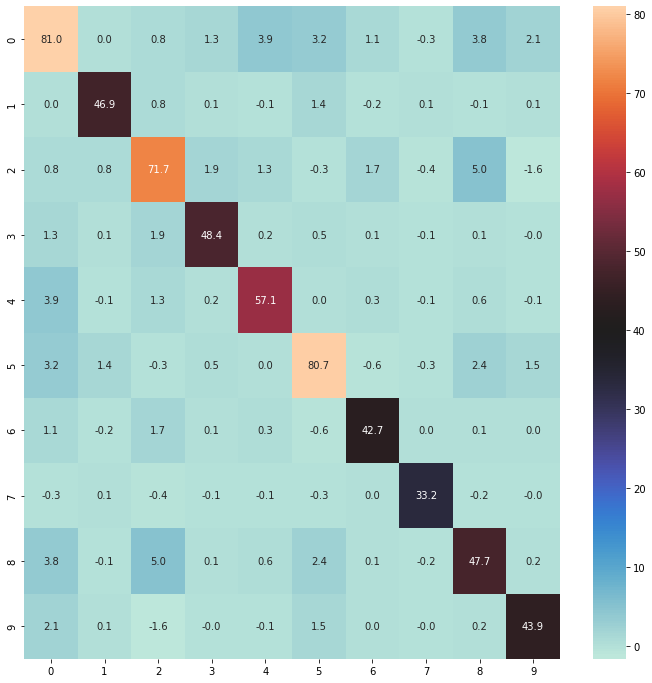

In [555]:
from sklearn.covariance import empirical_covariance

ec = empirical_covariance(str_x)

print(float_features[15])

plt.figure(figsize=(12,12))
sns.heatmap(ec, annot=True, fmt='.1f', center=40)
plt.show()

In [727]:
import itertools
pairs = list(itertools.combinations(all_set, 2))

print(str_x[0])

all_2_seqs = []
for i in range(str_x.shape[0]):
    for j in range(str_x.shape[1]-1):
        p = list(str_x[i,j:j+2])
        all_2_seqs.append(p)

[ 0 18  0 18  8  0  8 18  0 18]


In [728]:
all_2_seqs[0:5]

[[0, 18], [18, 0], [0, 18], [18, 8], [8, 0]]

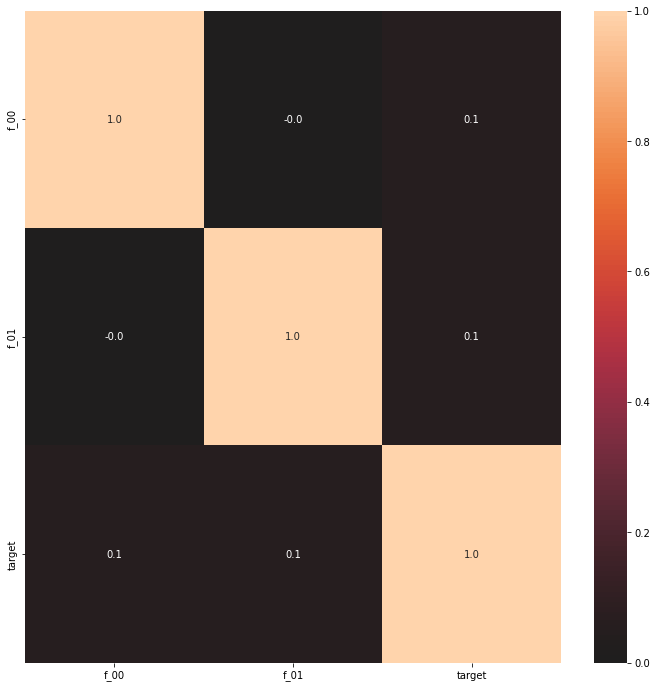

In [287]:
plt.figure(figsize=(12, 12))
sns.heatmap(Xp[['f_00', 'f_01'] + ['target']].corr(), center=0, annot=True, fmt='.1f')
plt.show()

---

# Processed Data

In [276]:
Xp = pd.read_parquet("/home/hpcgies1/Projects/TPS_may/Data/pre_processed_train.parquet")

In [282]:
Xp.columns

Index(['id', 'f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07',
       'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16',
       'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25',
       'f_26', 'f_28', 'f_29', 'f_30', 'target', 'ch0', 'ch1', 'ch2', 'ch3',
       'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'f_27_num', 'string_sum',
       'first_elem', 'last_elem', 'longest_seq', 'longest_seq_elem'],
      dtype='object')

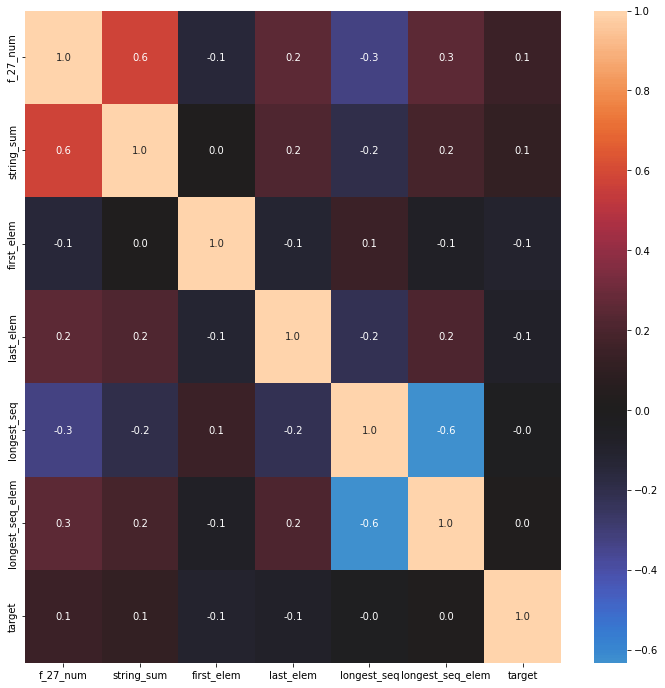

In [359]:
string_features = [#'ch0', 'ch1', 'ch2', 'ch3',
       #'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 
    'f_27_num', 'string_sum',
       'first_elem', 'last_elem', 'longest_seq', 'longest_seq_elem']

plt.figure(figsize=(12, 12))
sns.heatmap(Xp[string_features + ['target']].corr(), center=0, annot=True, fmt='.1f')
plt.show()

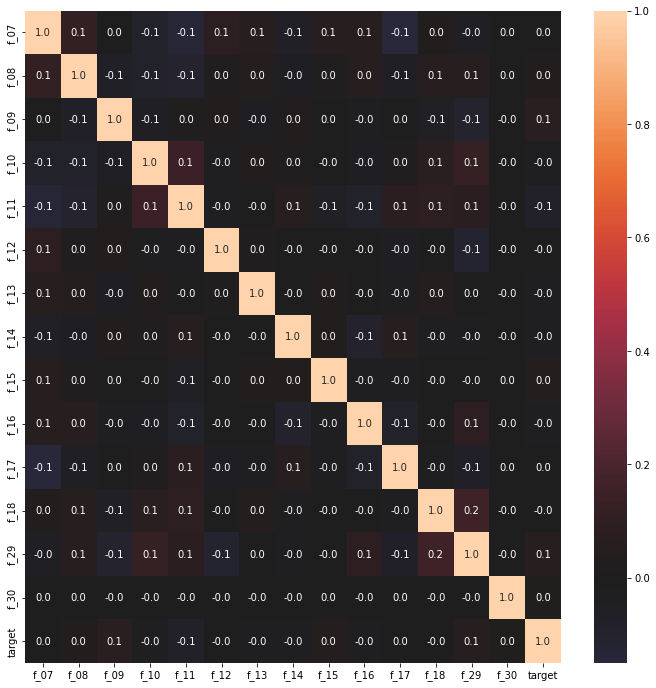

In [286]:
plt.figure(figsize=(12, 12))
sns.heatmap(X[int_features].corr(), center=0, annot=True, fmt='.1f')
plt.show()

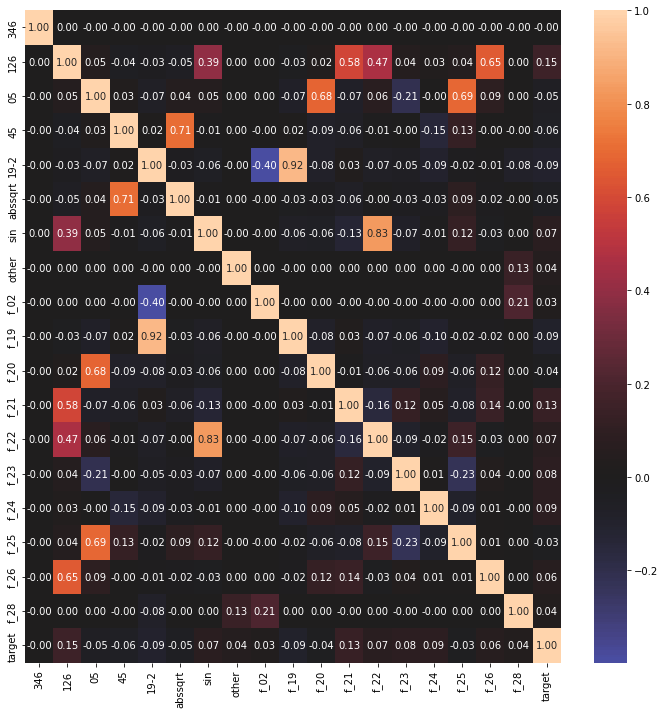

In [711]:
temp = X['f_00'] - X['f_04']

# Xp['0-4'] = temp
# Xp['4^2'] = np.power(X['f_04'],2)
# Xp['346'] = Xp['f_03']**2 + X['f_04']**2 + X['f_06']**2
# Xp['126'] = (Xp['f_21'] + Xp['f_22'] + Xp['f_26'])
# Xp['05']  = Xp['f_20'] + Xp['f_25']
# Xp['45']  = abs(0-Xp['f_24']) + abs(0-Xp['f_25'])
Xp['19-2']= Xp['f_19'] - Xp['f_02']
Xp['abssqrt'] = np.sqrt(abs(Xp['f_25']))
Xp['sin'] = Xp.f_22 - Xp.f_10 # np.sin(Xp['f_04']) - Xp['f_28']
Xp['other'] = Xp.f_00 + Xp.f_01 * Xp.f_03

plt.figure(figsize=(12, 12))
sns.heatmap(Xp[['346', '126', '05', '45', '19-2', 'abssqrt', 'sin', 'other', 'f_02', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_28'] + ['target']].corr(), center=0, annot=True, fmt='.2f')
plt.show()

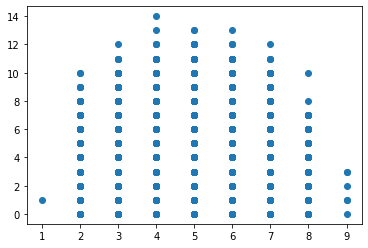

In [551]:
plt.scatter(Xp.f_27_num, Xp.f_10)

# Polynomial Features

---

In [556]:
from sklearn.preprocessing import PolynomialFeatures

In [595]:
def poly_features(df, degree:int=2, features: list = []):
    pb = PolynomialFeatures(degree=degree, include_bias=False)
    feature_names = []
    for i, c in enumerate(features):
        poly = pb.fit_transform(df[c])[:,len(c):]
        col_names = pb.get_feature_names_out()[len(c):]
        feature_names.append( list(col_names) )
        poly = pd.DataFrame(poly, columns=col_names)
        df = pd.concat([df, poly], axis=1)
    
    feature_names = [i for sublist in feature_names for i in sublist]
    return df, feature_names

In [703]:
Xp_poly, poly_features_out = poly_features(Xp, 3, [['f_10', *string_features]])
print(len(poly_features_out))

112


In [704]:
corr_ = Xp_poly[poly_features_out + ['target']].corr()

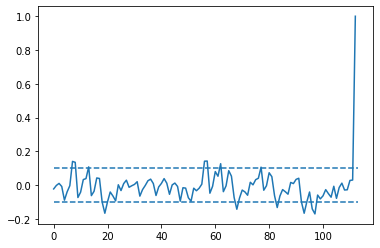

In [705]:
plt.figure()
plt.plot(corr_['target'].values)
plt.hlines(0.1, 0, len(corr_['target']), linestyle='--')
plt.hlines(-0.1, 0, len(corr_['target']), linestyle='--')
plt.show()

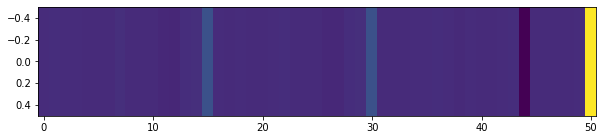

In [645]:
plt.figure(figsize=(10, 2))
# sns.heatmap(Xp_poly[poly_features_out[:50] + ['target']].corr(), center=0, annot=True, fmt='.1f')
plt.imshow(corr_['target'].values[None,:], aspect='auto')
plt.show()

# Analyse Predictions

In [792]:
mlp_preds = pd.read_csv("/home/hpcgies1/Projects/TPS_may/mlp_submission.csv")
mlp_preds2 = pd.read_csv("/home/hpcgies1/Projects/TPS_may/mlp_submission2.csv")
xgb_preds = pd.read_csv("/home/hpcgies1/Projects/TPS_may/xgb_submission.csv")
mlp_preds.shape

(700000, 2)

In [782]:
high_certainty_1 = np.where(mlp_preds > 0.9)[0]
high_certainty_0 = np.where(mlp_preds < 0.1)[0]
low_certainty = np.where(abs(mlp_preds-0.5) < 0.1)[0]
print(len(low_certainty))
print(len(high_certainty_1))
print(len(high_certainty_0))

12877
1000693
319819


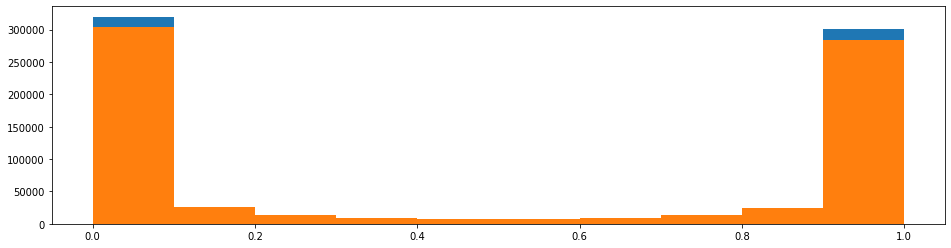

In [818]:
plt.figure(figsize=(16,4))
plt.hist(mlp_preds['target'], bins=10)
plt.show()

In [787]:
low_cert = Y.iloc[low_certainty]
high_cert1 = Y.iloc[high_certainty_1]
high_cert0 = Y.iloc[high_certainty_0]

In [790]:
print(low_cert.f_02.mean())
print(high_cert1.f_02.mean())
print(high_cert0.f_02.mean())

-0.0018510296532748903
0.01056542336511479
-0.03366181389764358


In [801]:
def compare_pred(p1, p2):
    count = 0
    idx = []
    for i in range(p1.shape[0]):
        if p1[i] < 0.3 and p2[i] > 0.7:
            count += 1
            idx.append( i )
        if p1[i] > 0.7 and p2[i] < 0.3:
            count += 1
    print(count)
    return idx
disagree = compare_pred(mlp_preds['target'], mlp_preds2['target'])

7329


In [820]:
comb = np.array([mlp_preds['target'], mlp_preds['target'], xgb_preds['target']])
comb = np.mean(comb, axis=0)
print(comb.shape)

sub = pd.read_csv("/home/hpcgies1/Projects/TPS_may/Data/sample_submission.csv")
sub['target'] = comb
sub.to_csv("submission.csv")

(700000,)


# Prediction analysis

In [138]:
cat_preds = pd.read_csv(f"{home_dir}/cat_submission.csv")
mlp_preds = pd.read_csv(f"{home_dir}/mlp_submission.csv")
lgb_preds = pd.read_csv(f"{home_dir}/lgb_submission.csv")
Y = pd.read_parquet(f"{home_dir}/Data/pre_processed_test2.parquet")

In [139]:
cat_targets = cat_preds['target'].values
mlp_targets = mlp_preds['target'].values
lgb_targets = lgb_preds['target'].values

In [151]:
# Spread in predictions

spread = []
for i in range(cat_targets.shape[0]):
    max_ = max(cat_targets[i], mlp_targets[i], lgb_targets[i])
    min_ = min(cat_targets[i], mlp_targets[i], lgb_targets[i])
    s = max_ - min_
    spread.append(s)

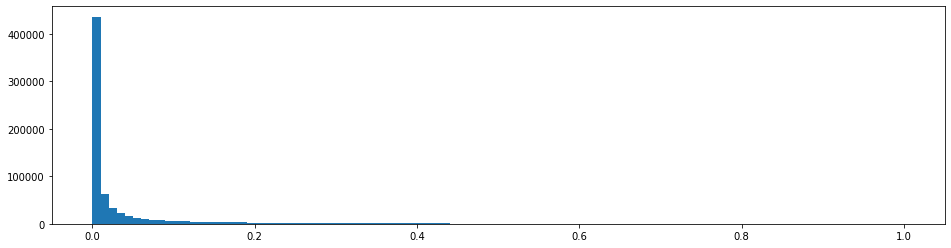

700000


In [156]:
plt.figure(figsize=(16,4))
plt.hist(spread, bins=100)
plt.show()

def median3(a, b, c):
    if a <= b <= c or c <= b <= a:
        return b
    elif b <= a <= c or c <= a <= b:
        return a
    else:
        return c

def spread_based_ensemble(spread):
    pred = []
    for i, s in enumerate(spread):
        if s > 0.01:
            p = median3(cat_targets[i], mlp_targets[i], lgb_targets[i])
        else:
            p = np.mean([cat_targets[i], mlp_targets[i], lgb_targets[i]])
        pred.append(p)
    return pred

predictions = spread_based_ensemble(spread)
print(len(predictions))

In [158]:
def gen_sub(target):
    sub = pd.read_csv(f"{home_dir}/Data/sample_submission.csv")
    sub['target'] = ls
    sub.to_csv(f"{home_dir}/cat_mlp_lgb_submission_spread.csv", index=False)
gen_sub(predictions)

[[1.         0.98519202 0.99324353]
 [0.98519202 1.         0.98185859]
 [0.99324353 0.98185859 1.        ]]


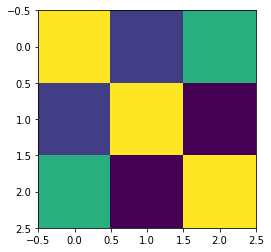

In [61]:
corr = np.corrcoef([cat_targets, mlp_targets, lgb_targets])
# sns.heatmap(corr, annot=True, fmt='.1f')
plt.imshow(corr)
print(corr)
plt.show()

In [63]:
for i in range(100):
    print(f"{cat_targets[i]:.4f} - {mlp_targets[i]:.4f} - {lgb_targets[i]:.4f}")
raise
ls = []
models = [cat_targets, mlp_targets, lgb_targets]
for i in range(cat_targets.shape[0]):
    zero = 0
    one = 0
    for m in models:
        if m[i] <= 0.5:
            zero += 1
        else:
            one += 1
    if zero > one:
        ls.append( 0 )
    else:
        ls.append( 1 )
print(len(ls))

0.9993 - 1.0000 - 0.9988
0.9982 - 1.0000 - 0.9975
0.0000 - 0.0000 - 0.0000
0.0003 - 0.0000 - 0.0005
0.9928 - 0.9985 - 0.9961
0.0867 - 0.0394 - 0.0305
0.0965 - 0.0322 - 0.0989
1.0000 - 1.0000 - 1.0000
0.0134 - 0.0005 - 0.0430
0.9918 - 1.0000 - 0.9968
0.0034 - 0.0001 - 0.0040
0.2354 - 0.0337 - 0.3015
0.0008 - 0.0002 - 0.0012
0.4115 - 0.9526 - 0.3199
0.9999 - 1.0000 - 0.9997
0.9999 - 1.0000 - 0.9998
0.9913 - 0.9998 - 0.9888
0.0025 - 0.0000 - 0.0021
0.0001 - 0.0000 - 0.0002
0.9987 - 1.0000 - 0.9952
0.1003 - 0.0465 - 0.1397
0.1652 - 0.0056 - 0.0601
0.9845 - 0.9999 - 0.9766
0.0569 - 0.0000 - 0.0021
0.0115 - 0.0007 - 0.0062
0.0033 - 0.0002 - 0.0043
0.0054 - 0.0012 - 0.0039
0.7773 - 0.5698 - 0.7495
0.9935 - 0.9986 - 0.9466
1.0000 - 1.0000 - 1.0000
0.8880 - 0.8913 - 0.9688
1.0000 - 1.0000 - 0.9999
0.9998 - 1.0000 - 0.9996
0.0037 - 0.0003 - 0.0032
0.9992 - 1.0000 - 0.9994
0.0559 - 0.0189 - 0.0103
0.0001 - 0.0000 - 0.0001
0.1728 - 0.2772 - 0.2125
0.9477 - 0.9986 - 0.9813
0.0256 - 0.0014 - 0.0369


RuntimeError: No active exception to reraise

In [69]:
def uncertain(preds):
    uncertain_ = []
    for i in range(preds.shape[0]):
        if preds[i] > 0.4 and preds[i] < 0.6:
            uncertain_.append(i)
    return uncertain_
u = uncertain(mlp_targets)
print(len(u))

7106


(700000, 59)


<Figure size 1152x648 with 0 Axes>

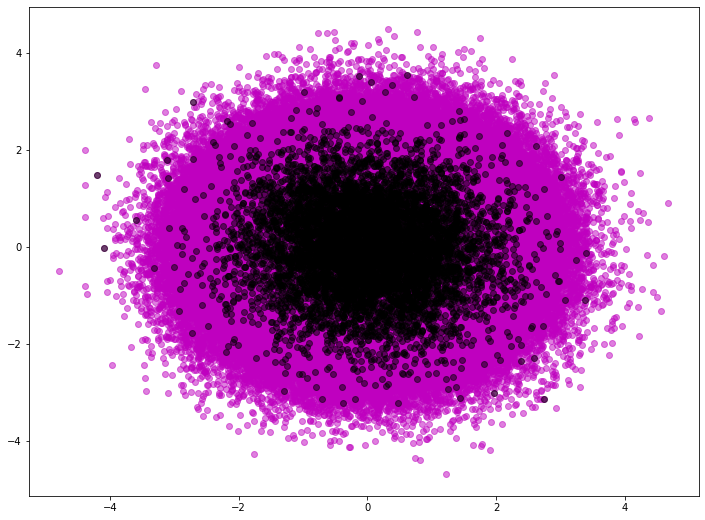

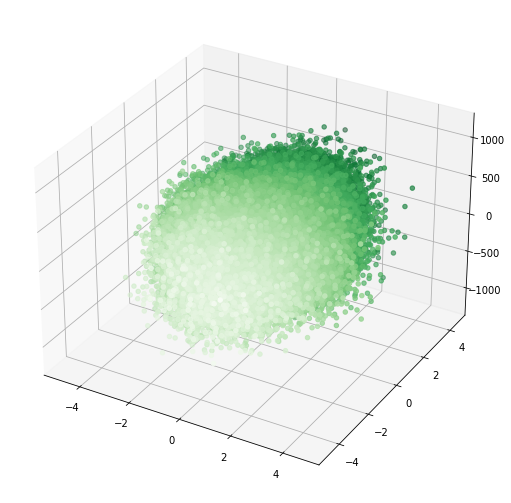

In [133]:
Y['target'] = mlp_targets
Y_u = Y.iloc[u]
print(Y.shape)

test_features = [f for f in Y_u.columns if f != 'id' and f != 'target' and Y_u[f].dtype=='float32']
# print(test_features)
test_features = test_features[:17]

fig = plt.figure(figsize=(16,9))


xx = Y['f_06'].values
yy = Y['f_04'].values
zz = Y['f_28'].values

plt.figure(figsize=(12,9))
plt.scatter(xx, yy, alpha=0.5, c='m', label='0')
plt.scatter(xx[u], yy[u], alpha=0.5, c='k')




# plt.show()

# from mpl_toolkits import mplot3d
# plt.figure(figsize=(16,9))
# ax = plt.axes(projection='3d')
# ax.scatter3D(xx, yy, zz, c=yy, cmap='Greens');
# plt.show()

In [13]:
disagree = []
for i in range(cat_targets.shape[0]):
    if cat_targets[i] < 0.5 and mlp_targets[i] > 0.5:
        disagree.append(i)
    elif cat_targets[i] > 0.5 and mlp_targets[i] < 0.5:
        disagree.append(i)
print(len(disagree))

11371


In [17]:
print(cat_targets[disagree[0:10]])
print(mlp_targets[disagree[0:10]])

[0.28532636 0.63792992 0.44414467 0.61149594 0.58321653 0.59405688
 0.82891373 0.13371177 0.18025599 0.33784712]
[0.8708501  0.31452036 0.69291896 0.33132806 0.47829226 0.3259576
 0.24721342 0.5483972  0.6718382  0.62014616]


In [48]:
cat_mlp = np.stack((cat_targets, mlp_targets), axis=0)
cat_mlp = np.mean(cat_mlp, axis=0)


In [49]:
def gen_sub(target):
    sub = pd.read_csv(f"{home_dir}/Data/sample_submission.csv")
    sub['target'] = ls
    sub.to_csv(f"{home_dir}/cat_mlp_lgb_submission_vote.csv", index=False)